In [154]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.stats.api as sms

from IPython.display import display
from IPython.display import Markdown as md
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 4)

import warnings
warnings.filterwarnings('ignore')

def dp(df, r = 5, c = None):
    from IPython.display import display
    with pd.option_context('display.max_rows', r, 'display.max_columns', c):
        display(df)

def fg(w = 6, h = 4, dpi = 120):
    plt.rcParams['figure.figsize'] = (w,h)
    plt.rcParams['figure.dpi'] = dpi
# fg()

# import autotime
# %load_ext autoreload
# %autoreload 2
# %load_ext autotime

# Teste AB manual

https://www.youtube.com/watch?v=u-huN8BLMi4

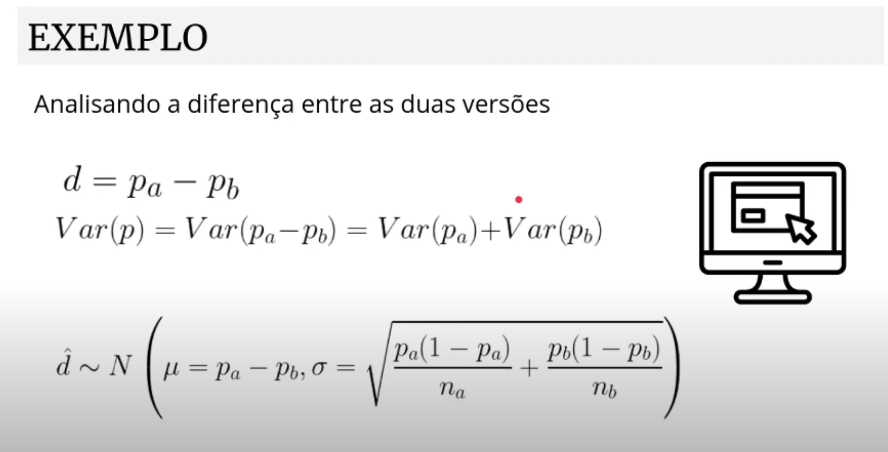

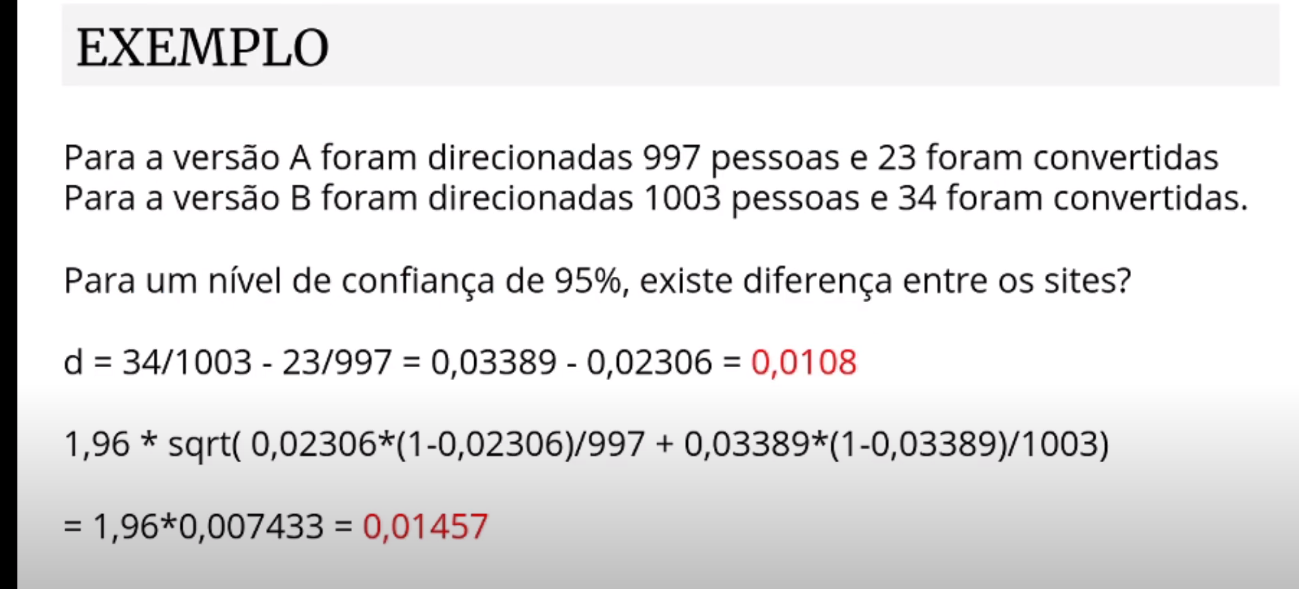

### Contas

In [90]:
popA = 997
popB = 1003
convA = 23
convB = 34

In [91]:
pA = convA/popA
pB = convB/popB
(pA, pB)

(0.023069207622868605, 0.03389830508474576)

In [92]:
pcalculado = dab = pB - pA; pcalculado


0.010829097461877157

In [93]:
from scipy.stats import norm

In [94]:
?norm.ppf

In [95]:
sigA = pA*(1-pA)/popA
sigB = pB*(1-pB)/popB
sigma = np.sqrt(sigB - sigA);
sigma

0.0031696091942964716

In [96]:
z = 2*(1 - norm.ppf(q = 0.95, loc = dab, scale = sigma))

In [97]:
value = np.sqrt((pA*(1-pA)/popA) + (pB*(1-pB)/popB))

In [98]:
(f'z: {z} and value {value}')

'z: 1.967914718717731 and value 0.007433444020931021'

### O limite para continuar acreditando na hipótese nula é :

In [99]:
pcritico = z*value;
pcritico

0.014628383899554469

In [100]:
pcalculado > pcritico

False

In [101]:
md("### O valor de pCalculado: ({}) não é maior que o valor de pCrítico ({}), \
   portanto, a probabilidade de se rejeitar a hipótese nula e estar errado é grande"\
   .format(np.round(pcalculado,4), np.round(pcritico,4)))

### O valor de pCalculado: (0.0108) não é maior que o valor de pCrítico (0.0146),    portanto, a probabilidade de se rejeitar a hipótese nula e estar errado é grande

# Outro exemplo

https://medium.com/@RenatoFillinich/ab-testing-with-python-e5964dd66143

In [102]:
md('## Grupo de controle (J) \
   \n ## Grupo de tratamento (A)')

## Grupo de controle (J)    
 ## Grupo de tratamento (A)

### 1 : O usuário pagou
###  0 : O usuário não pagou

In [103]:
# Guy imports 
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline

In [104]:
# Some plot styling preferences
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
# Calculating effect size based on our expected rates
effect_size = sms.proportion_effectsize(0.13, 0.15)  
effect_size

-0.0576728617308947

In [105]:
# Calculating sample size needed
required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  

In [106]:
# Rounding up to next whole number                          
required_n = ceil(required_n)                          

print(required_n)

4720


In [107]:
df = pd.read_csv('ab_data.csv')

In [108]:
dp(df)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
...,...,...,...,...,...
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [110]:
pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [112]:
session_counts = df['user_id'].value_counts(ascending=False)
multi_users = session_counts[session_counts > 1].count()

print(f'There are {multi_users} users that appear multiple times in the dataset')

There are 3894 users that appear multiple times in the dataset


In [113]:
users_to_drop = session_counts[session_counts > 1].index

df = df[~df['user_id'].isin(users_to_drop)]
print(f'The updated dataset now has {df.shape[0]} entries')

The updated dataset now has 286690 entries


In [114]:
control_sample = df[df['group'] == 'control'].sample(n=required_n, random_state=22)
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n, random_state=22)

In [115]:
ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)
ab_test

,user_id,timestamp,group,landing_page,converted
0,763854,2017-01-21 03:43:17.188315,control,old_page,0
1,690555,2017-01-18 06:38:13.079449,control,old_page,0
...,...,...,...,...,...
9438,662301,2017-01-03 08:10:57.768806,treatment,new_page,0
9439,944623,2017-01-19 10:56:01.648653,treatment,new_page,1


In [116]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   user_id       9440 non-null   int64 
 1   timestamp     9440 non-null   object
 2   group         9440 non-null   object
 3   landing_page  9440 non-null   object
 4   converted     9440 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 368.9+ KB


In [117]:
ab_test['group'].value_counts()

control      4720
treatment    4720
Name: group, dtype: int64

In [118]:
ab_test

,user_id,timestamp,group,landing_page,converted
0,763854,2017-01-21 03:43:17.188315,control,old_page,0
1,690555,2017-01-18 06:38:13.079449,control,old_page,0
...,...,...,...,...,...
9438,662301,2017-01-03 08:10:57.768806,treatment,new_page,0
9439,944623,2017-01-19 10:56:01.648653,treatment,new_page,1


In [125]:
conversion_rates = ab_test.groupby('group')['converted']

In [126]:
pd.crosstab(df['group'], df['converted'])

converted,0,1
group,,
control,126073,17220
treatment,126372,17025


In [124]:
# Std. deviation of the proportion
std_p = lambda x: np.std(x, ddof=0)
# Std. error of the proportion (std / sqrt(n))
se_p = lambda x: stats.sem(x, ddof=0)            

In [127]:
# Aplicação das funções média, std_p e se_p na coluna converted
conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])

In [147]:
conversion_rates

,mean,<lambda_0>,<lambda_1>
group,,,
control,0.123305,0.328787,0.004786
treatment,0.125636,0.331438,0.004824


In [148]:
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']


conversion_rates.style.format('{:.3f}')

,conversion_rate,std_deviation,std_error
group,,,
control,0.123,0.329,0.005
treatment,0.126,0.331,0.005


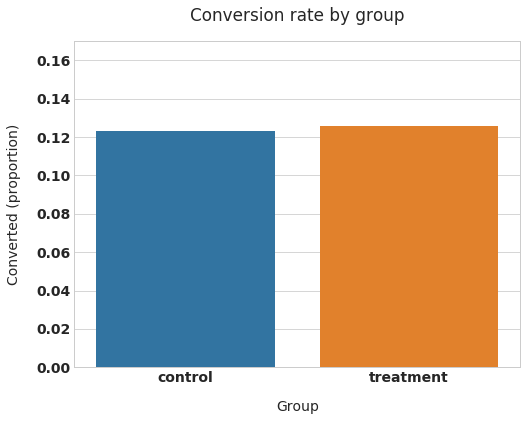

In [151]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

# Teste de hipótese

In [155]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

control_results = ab_test[ab_test['group'] == 'control']['converted']

treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']

n_con = control_results.count(); n_con
n_treat = treatment_results.count(); n_treat

4720

4720

In [156]:
# Controle(J) - Tratamento(A)
successes = [control_results.sum(), treatment_results.sum()]; successes
nobs = [n_con, n_treat]; nobs

[582, 593]

[4720, 4720]

In [163]:
crosstab = pd.crosstab(df['group'], df['converted']); crosstab

converted,0,1
group,,
control,126073,17220
treatment,126372,17025


In [159]:
z_stat, pval = proportions_ztest(count = successes, nobs=nobs)
(z_stat, pval)

(-0.342955932739339, 0.7316316123467367)

In [ ]:
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

In [152]:
print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.34
p-value: 0.732
ci 95% for control group: [0.114, 0.133]
ci 95% for treatment group: [0.116, 0.135]


# Não funfou : 

# Fazer o teste na mão de duas amostras

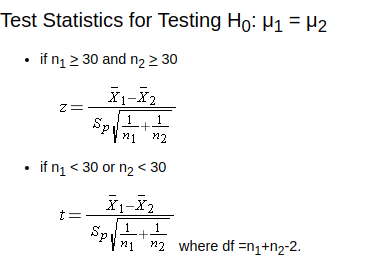

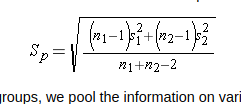

In [192]:
conversion_rates

,conversion_rate,std_deviation,std_error
group,,,
control,0.123305,0.328787,0.004786
treatment,0.125636,0.331438,0.004824


In [199]:
cr = np.array(conversion_rates)

In [220]:
x1 = cr[0][0]; x1
x2 = cr[1][0]; x2

0.12330508474576271

0.125635593220339

In [221]:
totais = np.array(crosstab)

n1 = np.sum(totais[0]); n1

n2 = np.sum(totais[1]); n2

143293

143397

In [222]:
s1 = cr[0][1]; s1
s2 = cr[1][1]; s2

0.32878707520461836

0.3314382158661053

### SP

In [232]:
ele1 = ((n1-1)*(s1**2)); ele1

15490.000012209763

In [233]:
ele2 = (n2 -1)*(s2**2); ele2

15752.235715131357

In [234]:
df = n1+n2-2; df

286688

In [236]:
sp = np.sqrt((ele1 + ele2)/df); sp

0.33011578780906603

### Z

In [237]:
diffmean = x1 - x2; diffmean

-0.002330508474576276

In [238]:
raizn = np.sqrt((1/n1) + (1/n2)); raizn

0.0037352850696494434

In [240]:
z = diffmean/(sp*raizn); z

-1.8899949319767075